In [1]:
using DataFrames
using PyPlot

INFO: Loading help data...


# Function Declarations

In [2]:
function θ(X;t::Float64=0.5)
    return map(X) do x
        if x<t
            return 0
        else
            return 1
        end
    end
end
function θ!(X::Matrix{Float64};t::Float64=0.5)
    map!(X) do x
        if x<t
            return 0
        else
            return 1
        end
    end
end;

### Function to Generate Tiles 
Generate a factor matrix of dimension $n\times r$ where the number of ones in every column is between $lMin\leq |X_{\cdot s}|\leq dMax+lMin$. 

In [5]:
function generateFactor(
    n::Int64, #dimension
    r::Int64, #rank
    lMin::Int64, #minimum length of a tile (block size)
    dMax::Int64 #maximum density of random part 
    )
    X=int(zeros(n,r))
    t = r*lMin+1 #current transaction index
    for s = 1:r
        a = (s-1)*lMin+1
        b = s*lMin
        X[a:b,s]=1 #create block
        d = rand(0:dMax)+t
        X[t:d,s]=1
        X[t:n,s]=shuffle(X[t:n,s])
    end
    return X
end;

### Functions to Plot and to Add Noise 
Function to plot matrices

In [16]:
function plot(D::Array{Int64,2})
    set_cmap("Set3")
    figure(figsize = [2,4])
    ax = axes(aspect=1)
    axis("off")
    imshow(D,interpolation="none")
end;

Function to add noise

In [7]:
function addNoise(D::Array{Int64,2}, # data matrix with original tiles
    pminus::Float64, # probability to flip a one to zero
    pplus::Float64) #probability to flip a zero to one
    DNoise = copy(D)
    for i = 1:size(D,2)
        for j = 1:size(D,1)
            if D[j,i] ==0
                if rand() <= pplus
                    DNoise[j,i]=1
                end
            else
                if rand() <= pminus
                    DNoise[j,i]=0
                end
            end
        end
    end
    return DNoise
end;

# Generate Matrices

In [8]:
m=1500
n=600
r=30;

In [25]:
#at least 1% of uniquely assigned ones for each tile 
lxMin = int(ceil(n/100)) 
lyMin = int(ceil(m/100))
d = 10 #% maximum density in random part
dxMax = int(ceil((n-r*lxMin)*d/100))
dyMax = int(ceil((m-r*lyMin)*d/100));

Figure(PyObject <matplotlib.figure.Figure object at 0x7f9a4629e210>)

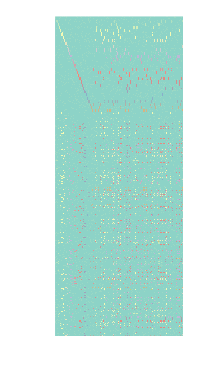

In [26]:
X = generateFactor(n,r,lxMin,dxMax)'
Y = generateFactor(m,r,lyMin,dyMax)
D=Y*((1:r).*X)
p₊=10 #%
p₋=10 #%
DN = addNoise(D,p₋/100,p₊/100);
plot(DN)
close()